# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file="/content/pokemon_df.csv"

In [3]:
data=pd.read_csv(file)

In [4]:
data.head()

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


# EDA 

In [5]:
data.describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


In [7]:
data.columns

Index(['Name', 'Total', 'HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence',
       'Speed'],
      dtype='object')

In [8]:
data.shape

(1045, 8)

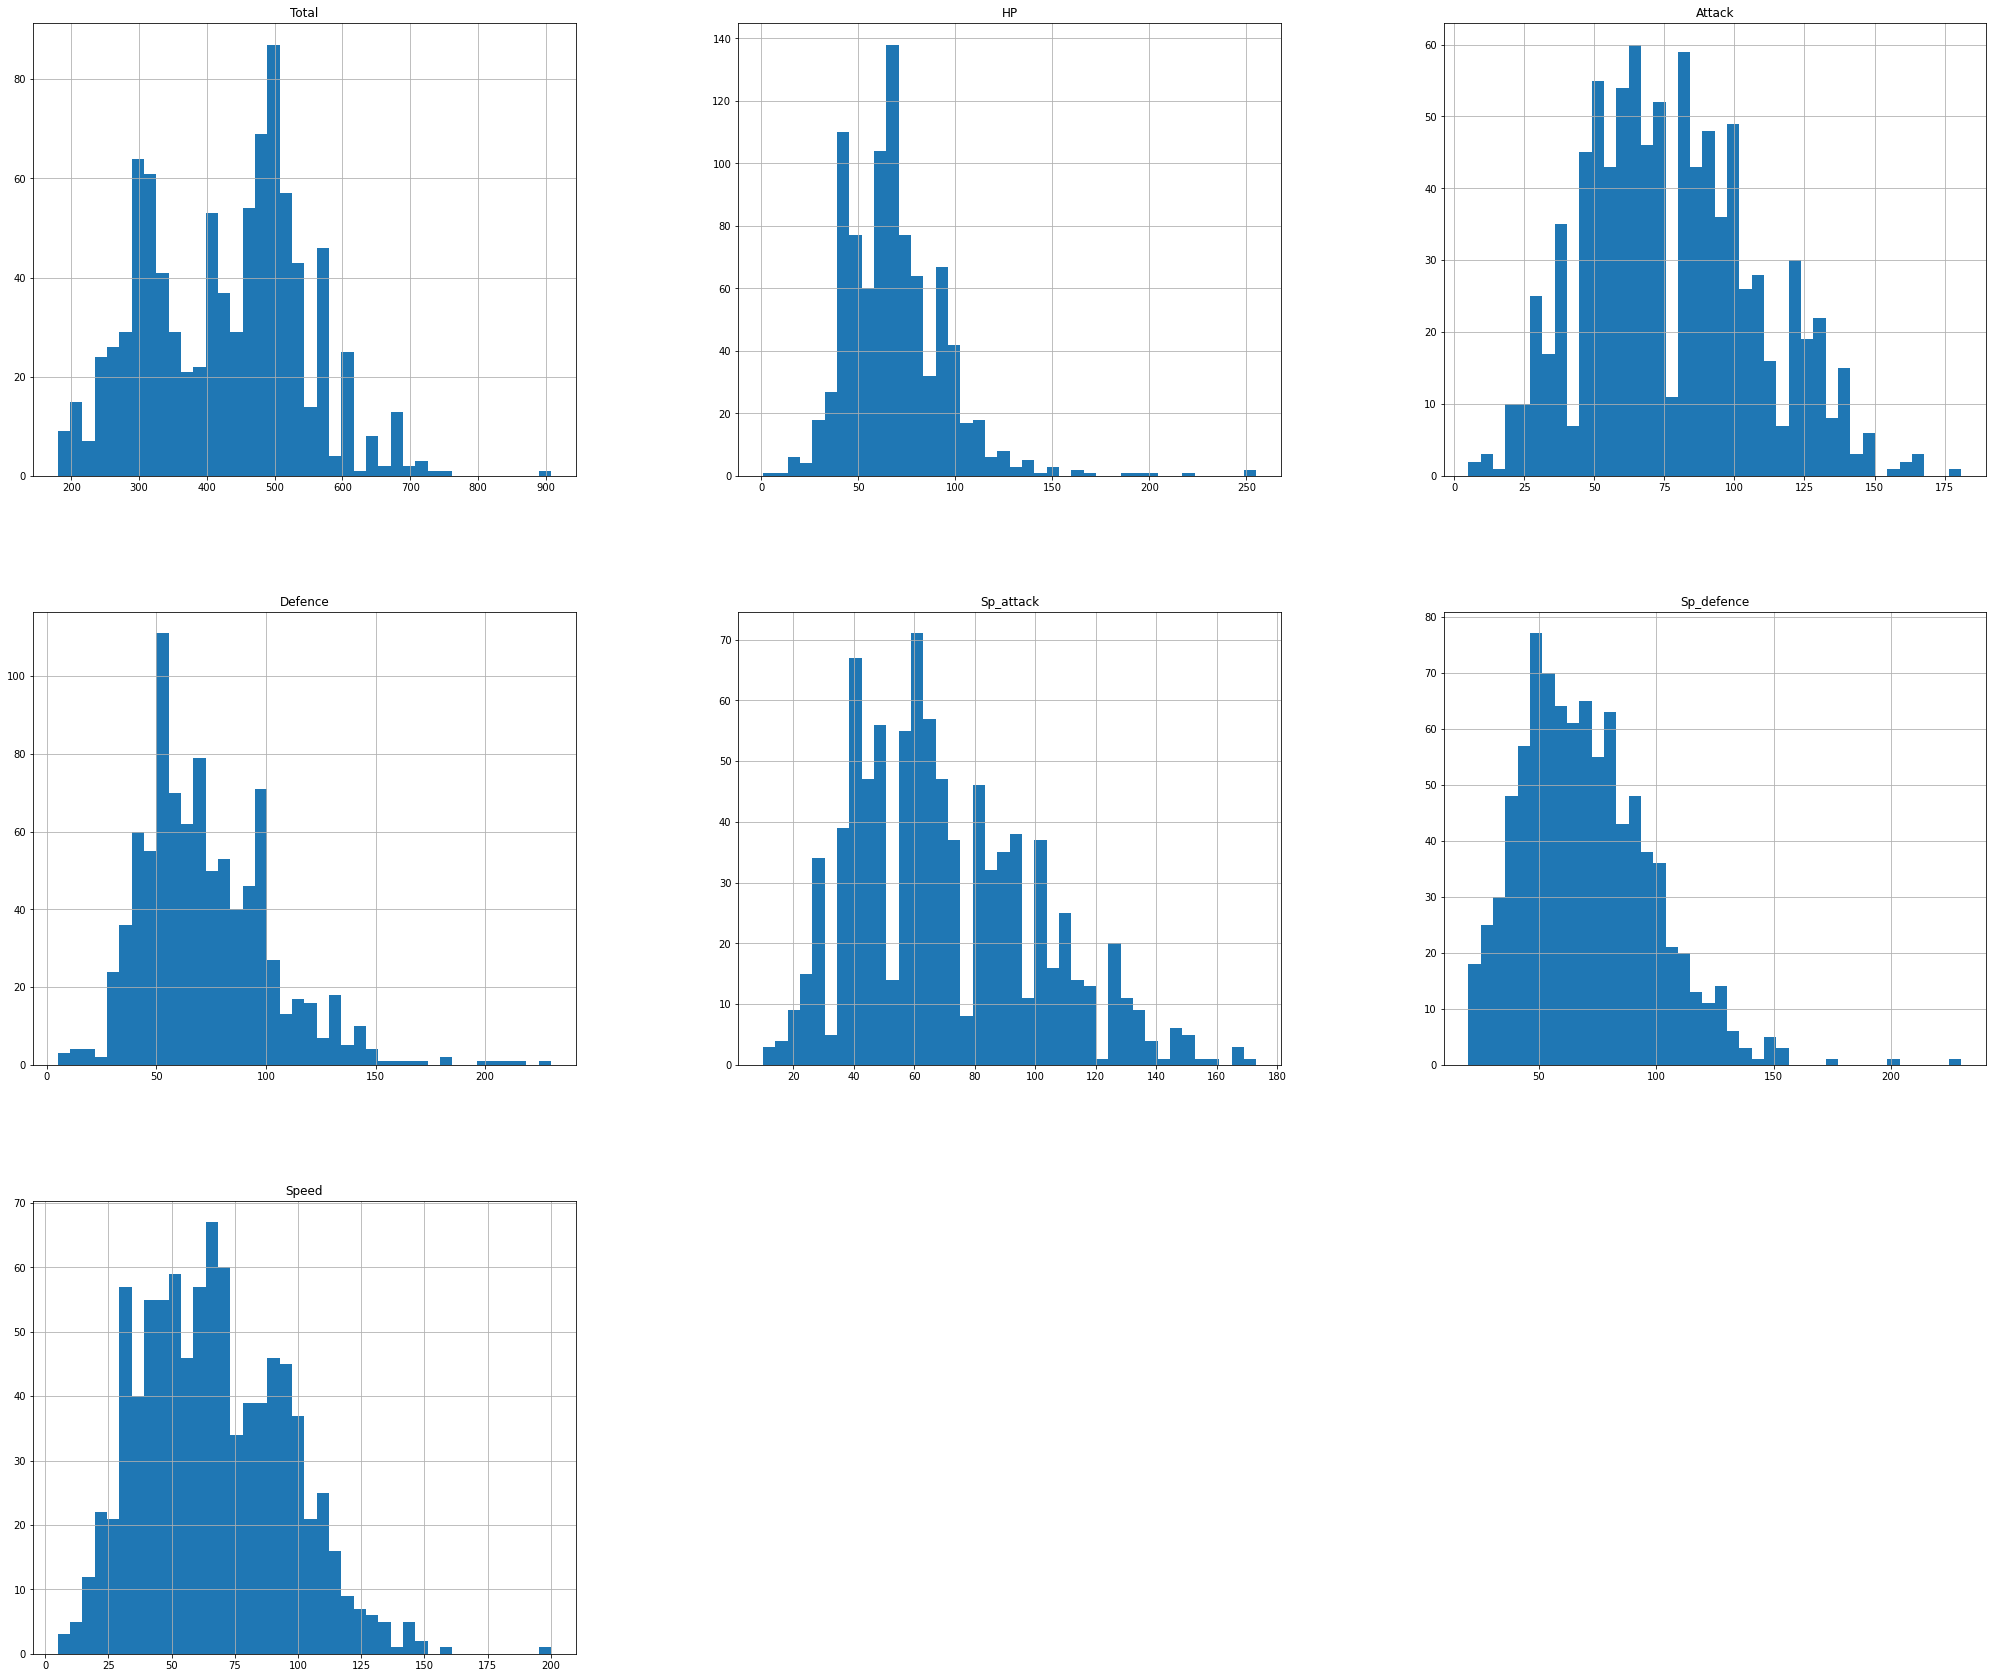

In [14]:
data.hist(figsize = (35,30), bins = 40)
plt.show()

In [15]:
data.isnull().sum() # Notjing is null

Name          0
Total         0
HP            0
Attack        0
Defence       0
Sp_attack     0
Sp_defence    0
Speed         0
dtype: int64

In [16]:
len(data["Name"].unique())

898

In [17]:
dups=data[data["Name"].duplicated(keep=False)] # Duplicafe values

In [18]:
data=data.groupby('Name', as_index=False,sort=False).mean()
data.head()

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,Ivysaur,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,575.0,80.0,91.0,103.0,111.0,110.0,80.0
3,Charmander,309.0,39.0,52.0,43.0,60.0,50.0,65.0
4,Charmeleon,405.0,58.0,64.0,58.0,80.0,65.0,80.0


### Dulpicate values are handled


In [19]:
data.corr()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
Total,1.000000,0.654011,0.730227,0.629320,0.724990,0.711868,0.553955
HP,0.654011,1.000000,0.454441,0.273364,0.377702,0.378054,0.189495
Attack,0.730227,0.454441,1.000000,0.479564,0.345804,0.254067,0.352848
Defence,0.629320,0.273364,0.479564,1.000000,0.218547,0.519343,0.008523
Sp_attack,0.724990,0.377702,0.345804,0.218547,1.000000,0.513672,0.437293
Sp_defence,0.711868,0.378054,0.254067,0.519343,0.513672,1.000000,0.219788
Speed,0.553955,0.189495,0.352848,0.008523,0.437293,0.219788,1.000000


In [20]:
data.iloc[data["Total"].idxmax()]

Name          Eternatus
Total             907.5
HP                197.5
Attack              100
Defence           172.5
Sp_attack           135
Sp_defence        172.5
Speed               130
Name: 889, dtype: object

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data[['Total', 'HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence','Speed']]=scaler.fit_transform(data[['Total', 'HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence','Speed']])

In [22]:
data.head()

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,0.189691,0.173228,0.250000,0.195556,0.337423,0.214286,0.205128
1,Ivysaur,0.309278,0.232283,0.323864,0.257778,0.429448,0.285714,0.282051
2,Venusaur,0.542955,0.311024,0.488636,0.435556,0.619632,0.428571,0.384615
3,Charmander,0.177320,0.149606,0.267045,0.168889,0.306748,0.142857,0.307692
4,Charmeleon,0.309278,0.224409,0.335227,0.235556,0.429448,0.214286,0.384615


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data_pca=pca.fit_transform(data[['HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence','Speed']])
pd.DataFrame(data_pca)

,0,1,2
0,-0.203525,-0.094154,0.076044
1,-0.027543,-0.094398,0.081355
2,0.325206,-0.047013,0.133405
3,-0.215475,-0.121622,-0.045484
4,-0.018891,-0.137759,-0.027387
...,...,...,...
893,0.357876,-0.327168,-0.492904
894,0.259564,-0.050730,-0.119136
895,0.278349,0.439241,0.112845
896,0.378591,-0.424041,-0.030338


In [27]:
 from sklearn.decomposition import PCA
 pca = PCA(n_components=3)
 data_pca=pca.fit_transform(data[['HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence','Speed']])
 data_pca=pd.DataFrame(data_pca)

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

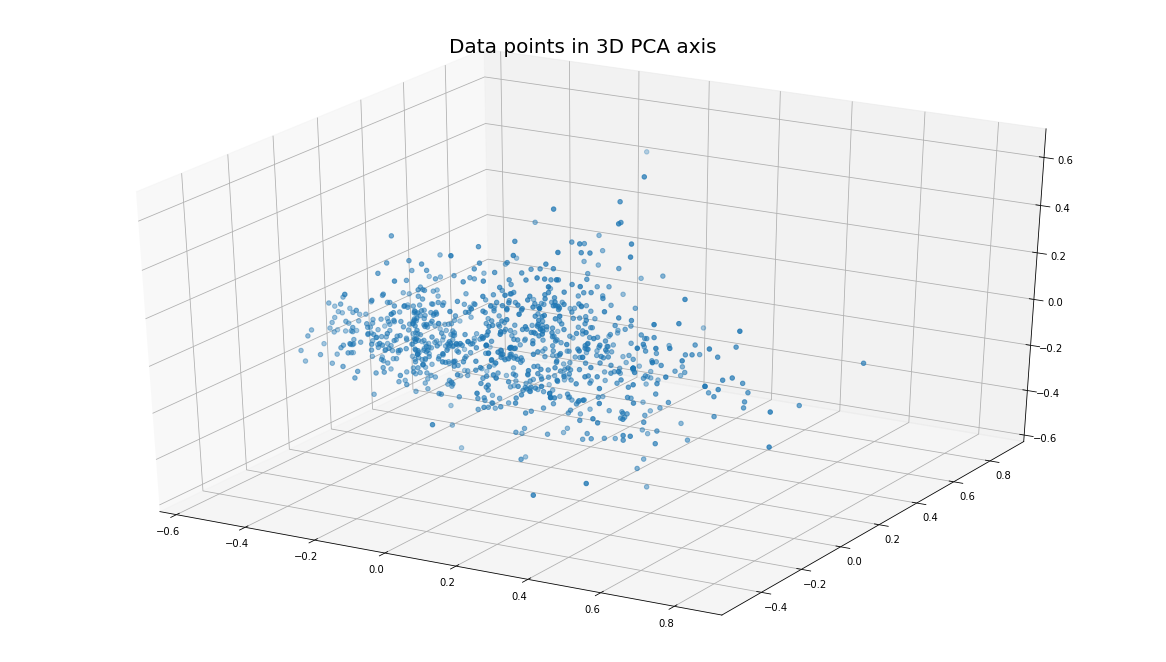

In [29]:
tocluster = pd.DataFrame(data_pca[[0,1,2]])
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(10)

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))
    



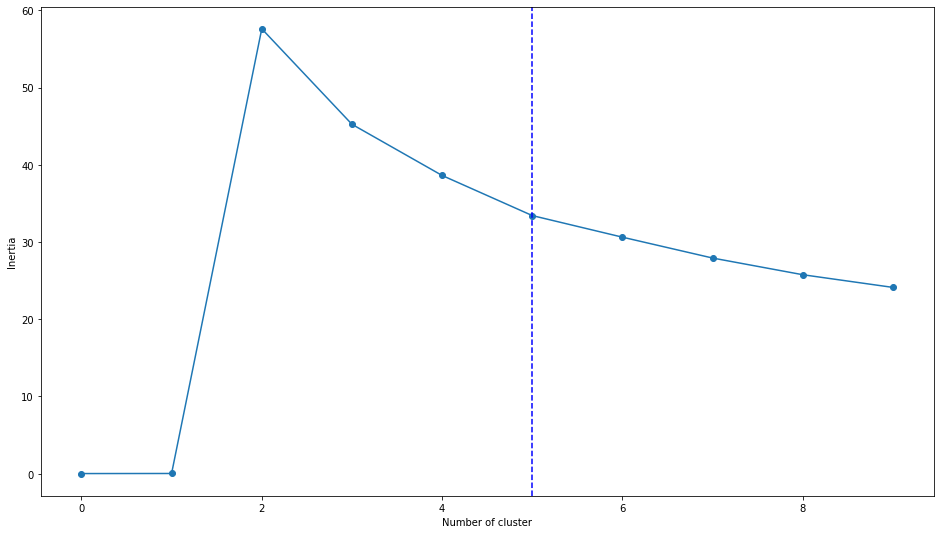

In [31]:
plt.plot(range(0,10),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=5, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

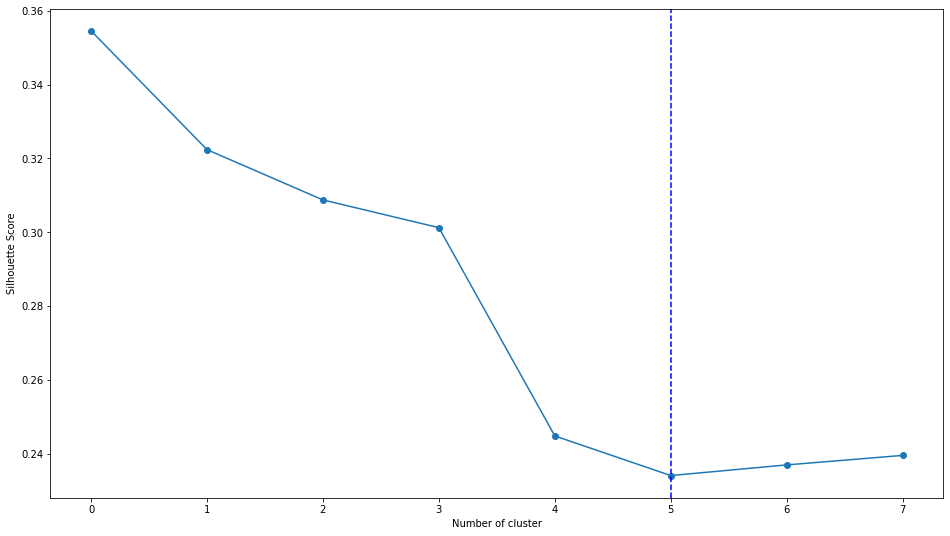

In [32]:
plt.plot(range(0,8),scores,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=5, color='blue', linestyle='--')
plt.ylabel('Silhouette Score')
plt.show()